<a href="https://colab.research.google.com/github/easyymm/DArt-B_Project/blob/main/titanic_DArt_B_%EB%84%88%EB%8B%A4%EB%82%98%EB%B9%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [832]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [833]:
# 코렙 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [834]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/titanic/titanic/asset/'
args.train_csv = args.default_path+'train.csv' #위의 파일 경로에다가 추가 경로만 덧붙이는 거. 이런 것이 가능하다라는 것을 알기
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'result/submission.csv'
args.save_results = args.default_path+"result/model_results.json"

# 데이터 분석을 위한 변수들
args.random_state = 42
args.results = []

#easydict 라이브러리를 사용하여 간단한 설정 및 변수들을 정의하고 초기화하는 작업을 수행

In [835]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [836]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)
submission = pd.read_csv(args.submission_csv)

In [837]:
ori_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [838]:
ori_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [839]:
ori_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [840]:
ori_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [841]:
print(ori_train.shape)
print(ori_test.shape)

(891, 12)
(418, 11)


- PassengerId
- Surived:0=사망, 1=생존
- Pclass: 1=1등석, 2=2등석, 3=3등석
- Name: 승객 이름
- Sex: male=남성, female=여성
- Age: 나이(나이가 추정되었다면 .5 형식으로 표시)
- SibSp: 타이타닉 호에 동승한 자매/배우자의 수
- Parch: 타이타닉 호에 동승한 부모/자식의 수(일부 어린이는 유모와 함께 여행했으므로 parch=0으로 표시)
- Ticket: 티켓 번호
- Fare: 승객 요금
- Cabin: 방 호수
- Embarked: 탑승지; C=셰르부르, Q=퀴즈타운, S=사우샘프턴

# 데이터 전처리

In [842]:
print(ori_train.isnull().sum())
print('-')
print(ori_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: >

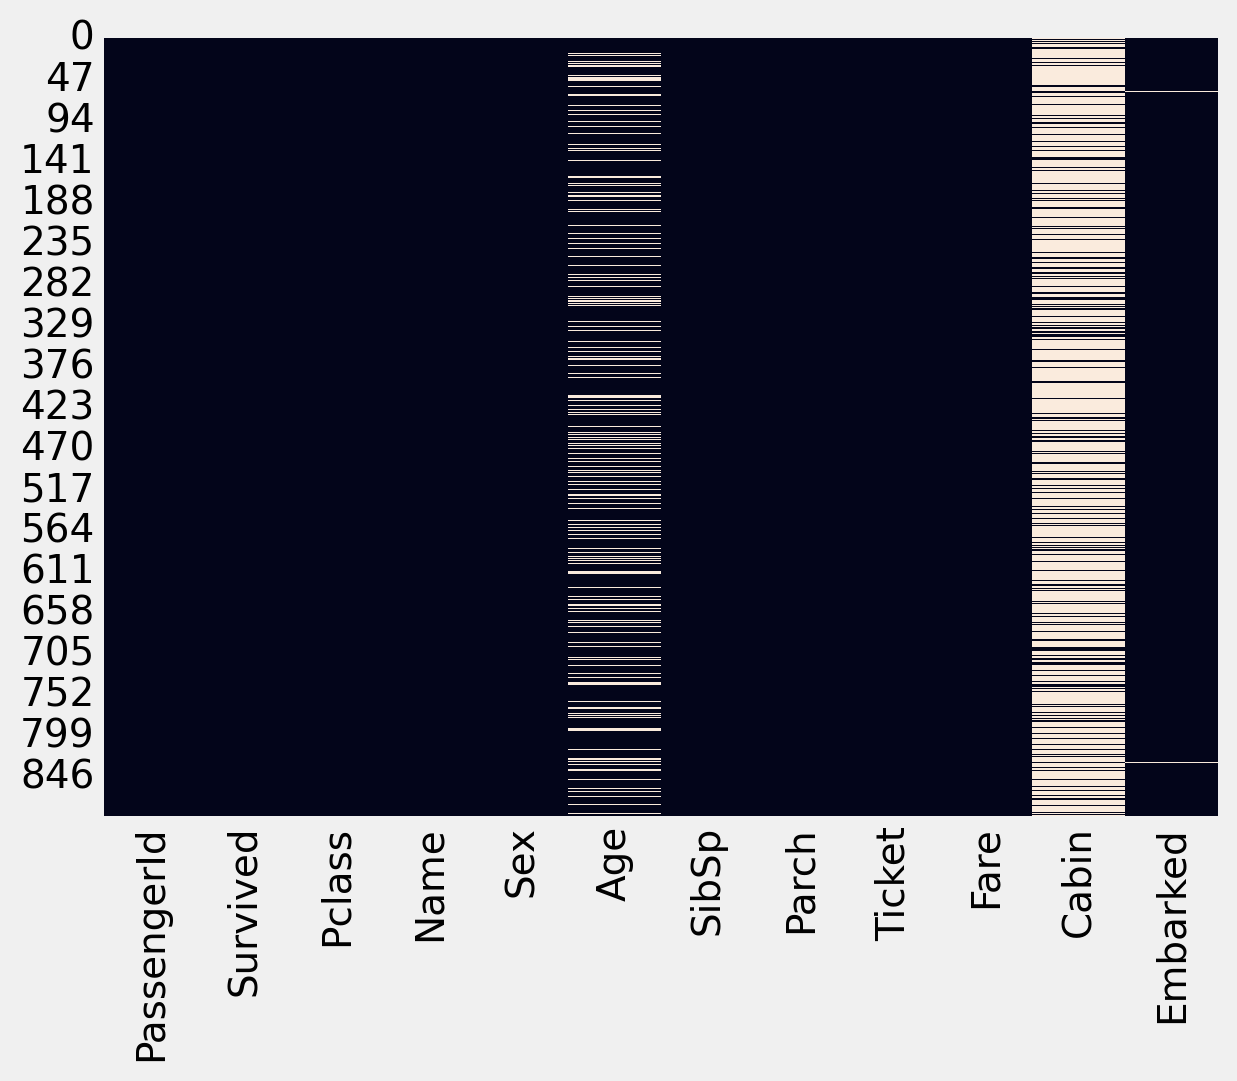

In [843]:
# 결측치 시각화-train
%matplotlib inline
sns.heatmap(ori_train.isnull(), cbar=False)

<Axes: >

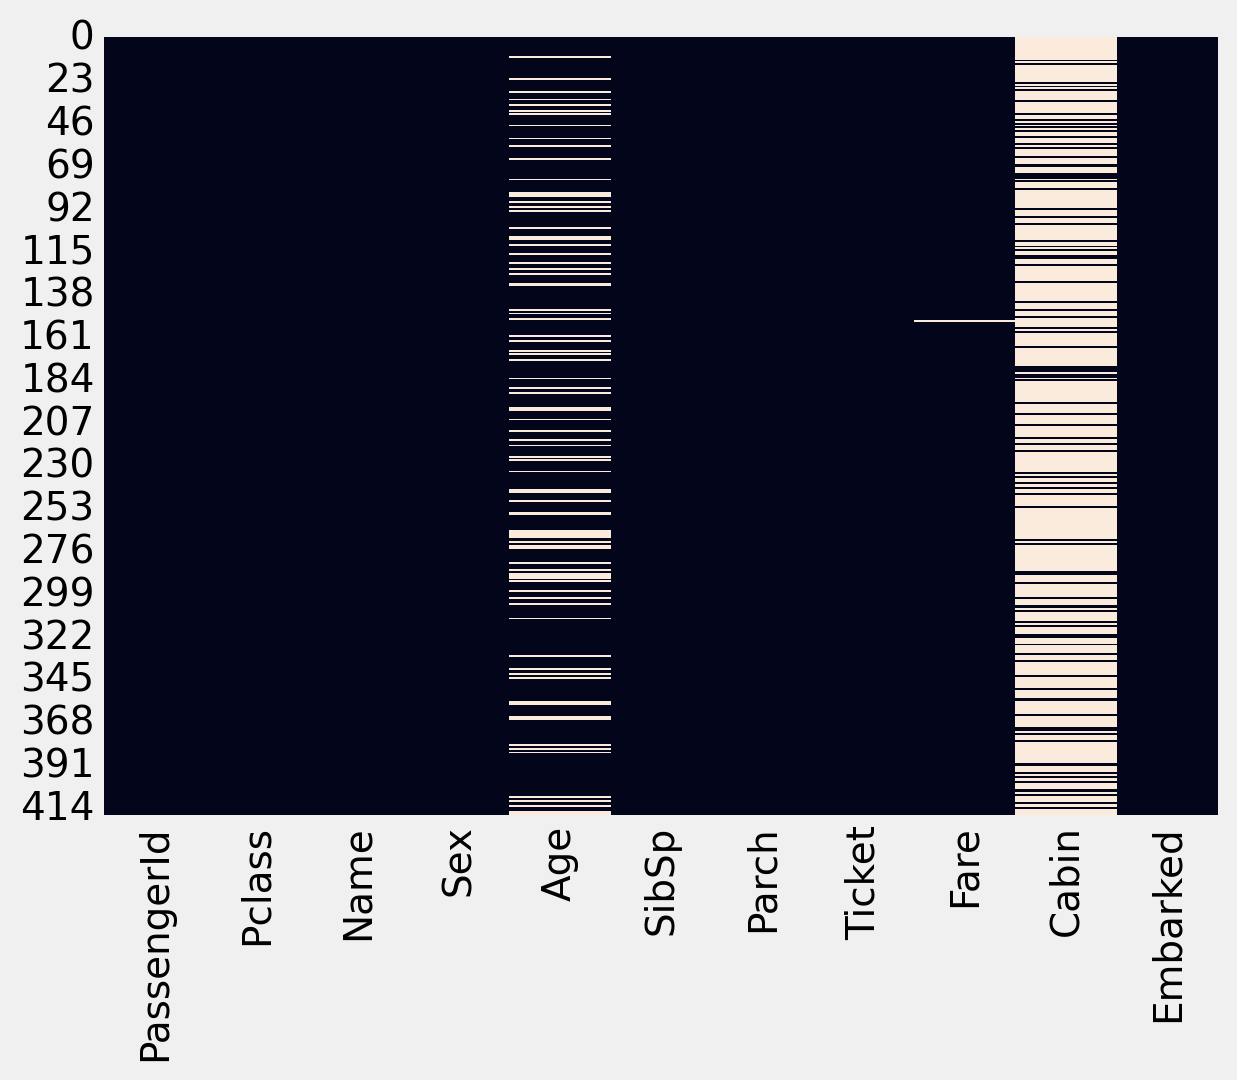

In [844]:
# 결측치 시각화-test
%matplotlib inline
sns.heatmap(ori_test.isnull(), cbar=False)

시계열 데이터가 아니기에 train, test 데이터를 합쳐서 한번에 전처리 후 다시 나누기로 함. train과 test를 개별적으로 전처리 시 서로 다른 기준으로 전처리 될 가능성(결측치, 이상치, 인코딩, 스케일링 등)이 있기 때문.

In [845]:
#Test에 'Survived' 열 추가+NaN으로 채움, train과 test 합침
ori_test['Survived'] = np.nan

df = pd.concat([ori_train, ori_test], axis=0)

In [846]:
df.shape

(1309, 12)

## 결측치 처리

In [847]:
print(df.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


<Axes: >

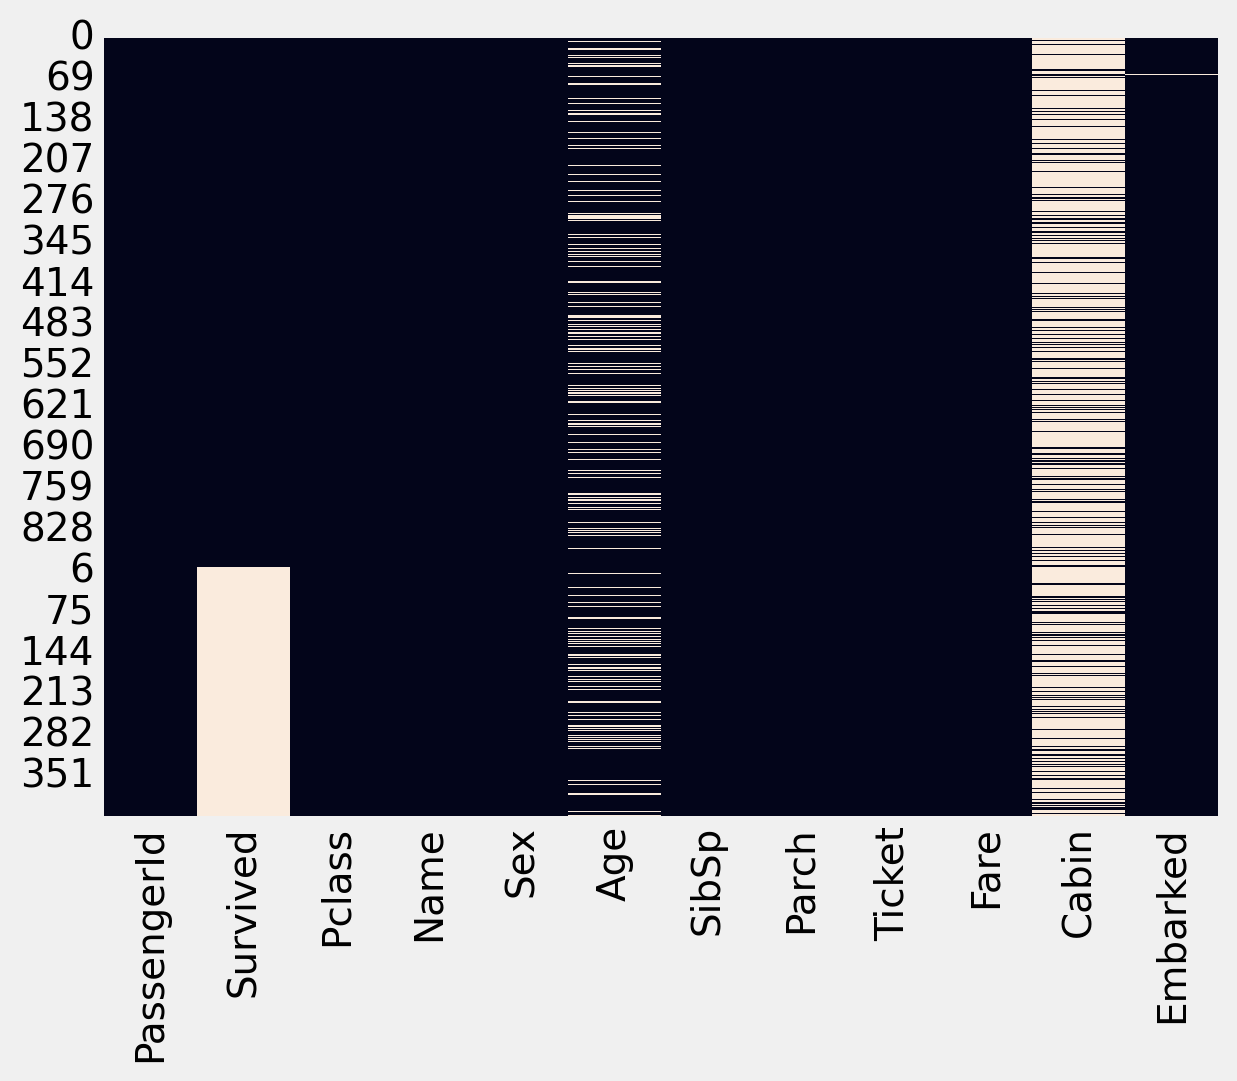

In [848]:
# 결측치 시각화
%matplotlib inline
sns.heatmap(df.isnull(), cbar=False)

Age, Cabin, Fare, Embarked에서 결측치 발견  
1)    Age: 약 20%의 결측치. 평균, 중앙값, KNN 등의 결측치 보간 방법 비교  
2)    Cabin: 결측치가 50% 이상을 차지하여, 컬럼을 제거  
3)    Fare:
4)    Embarked: 범주형이므로 mode 사용  


###Age 결측치 처리

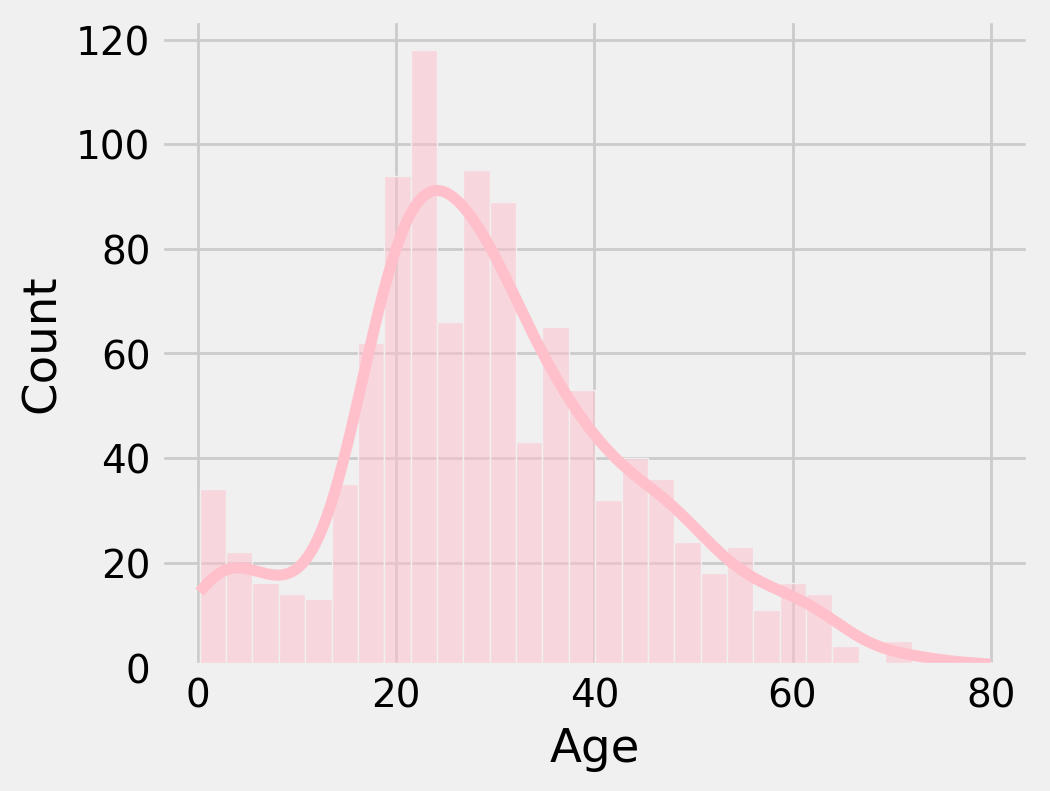

In [849]:
# 원본 Age 분포
plt.figure(figsize=(5,4))
sns.histplot(df['Age'], bins=30, kde=True, color='pink')
plt.show()

#### 평균

In [850]:
mean_df = df.copy()
mean_df['Age'].fillna(mean_df['Age'].mean(), inplace=True)
print(mean_df['Age'].mean())

29.881137667304014


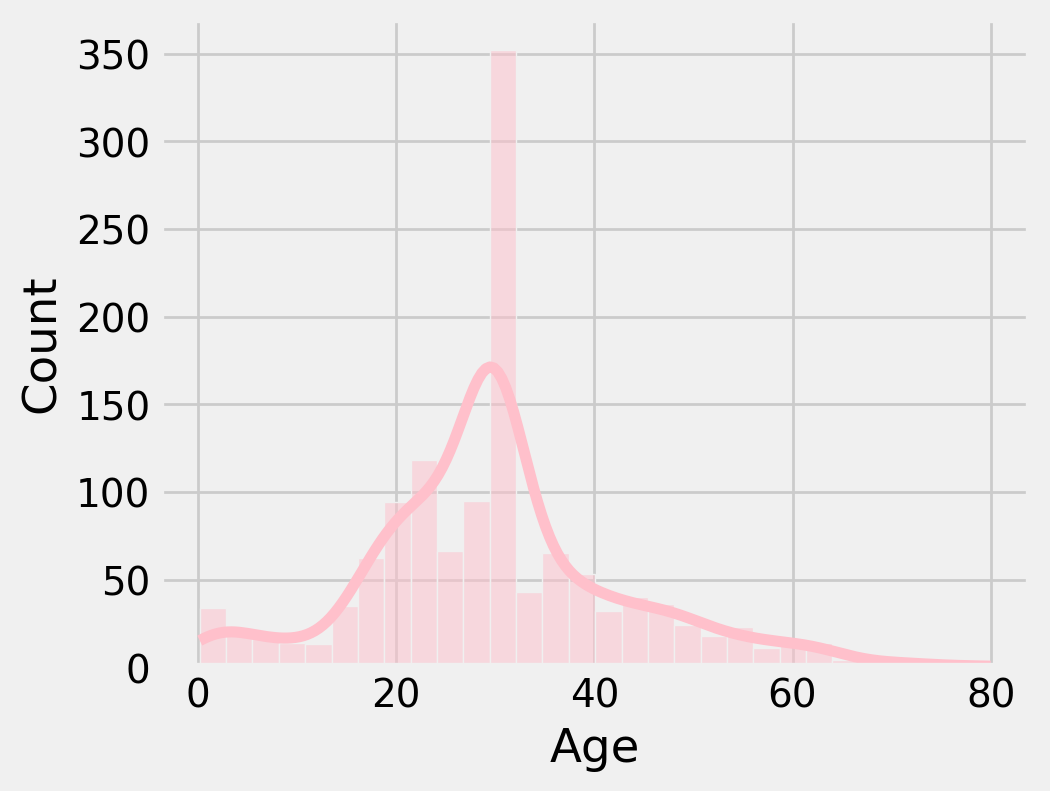

In [851]:
plt.figure(figsize=(5,4))
sns.histplot(mean_df['Age'], bins=30, kde=True, color='pink')
plt.show()

#### 중앙값

In [852]:
median_df = df.copy()
median_df['Age'].fillna(median_df['Age'].median(), inplace=True)
print(median_df['Age'].mean())

29.50318563789152


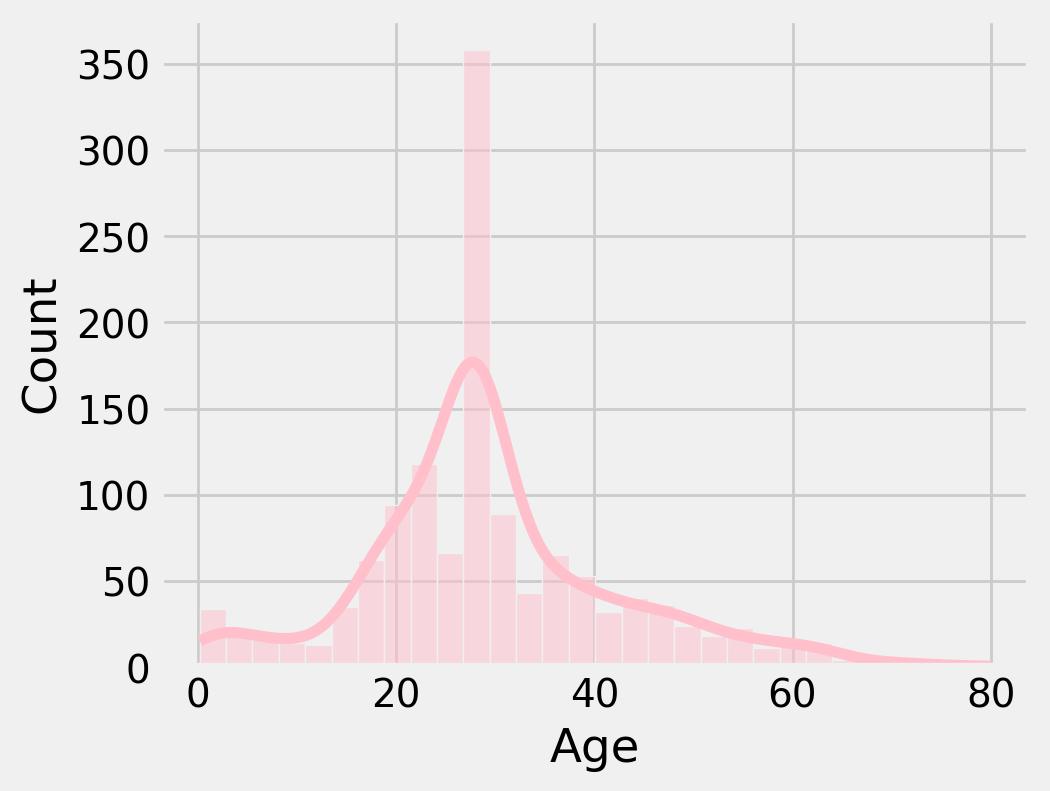

In [853]:
plt.figure(figsize=(5,4))
sns.histplot(median_df['Age'], bins=30, kde=True, color='pink')
plt.show()

#### KNN

In [854]:
from sklearn.impute import KNNImputer
# KNN
# 범주형 변수->숫자
knn_df = df.copy()
knn_df['Sex'] = knn_df['Sex'].map({'male': 0, 'female': 1})

imputer = KNNImputer(n_neighbors=5)
knn_df[['Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Sex']] = imputer.fit_transform(knn_df[['Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Sex']])

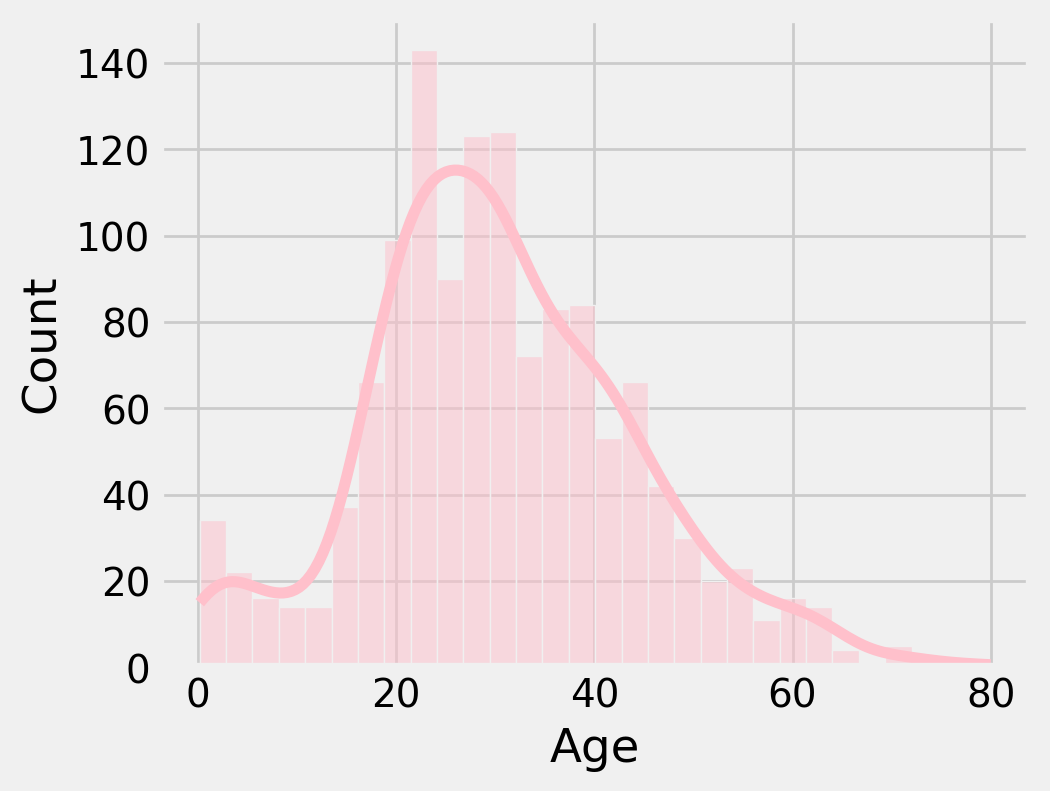

In [855]:
plt.figure(figsize=(5,4))
sns.histplot(knn_df['Age'], bins=30, kde=True, color='pink')
plt.show()

#### 새 피처 생성: Title(<-Name)

'Title' 기반 나이 결측치 보간 시, 나이를 더 정확하게 보간할 수 있을 것임.

- Miss: 미혼 여성, 여자아이
- Mrs: 기혼 여성
- Mr: 성인 남성
- Master: 남자아이
---
- Lady: 영국 귀족 여성
- Sir: 영국 기사 작위 남성
- Don: 스페인어권 귀족 남성
- Jonkheer: 네덜란드 귀족 남성
- Col: 군사 계급. 대령.
- Major: 군사 계급. 중령.
- Rev: 성직자
- Dr: 의사, 박사

=> 수가 많지 않기 때문에 합치기:  
Lady(1명)->Miss  
Sir+Don+Jonkheer->Royalty_M   
Col+Major->Military  
Rev  
Dr

In [856]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()

,count
Title,
Mr,757
Miss,260
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Mlle,2
Major,2


In [857]:
# 같은 의미의 타이틀은 합침
df['Title'] = df['Title'].replace({
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Lady': 'Miss',
    'Sir': 'Royalty_M', 'Don': 'Royalty_M', 'Jonkheer': 'Royalty_M',
    'Col': 'Military', 'Major': 'Military'
    })
pd.crosstab(df['Title'], df['Sex'])
# False=Male, True=Female

Sex,female,male
Title,,
Capt,0,1
Countess,1,0
Dona,1,0
Dr,1,7
Master,0,61
Military,0,6
Miss,265,0
Mr,0,757
Mrs,198,0


In [858]:
df['Title'].count()

1309

In [859]:
# 타이틀별로 나이 결측치 중앙값으로 보간
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [860]:
df['Age'].isnull().sum()

0

### Cabin
결측치 너무 많으므로 컬럼 드랍

In [861]:
df.drop(['Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,S,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Dona
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,29.0,0,0,359309,8.0500,S,Mr


### Embarked

범주형 변수이므로, Mode로 결측치 보간



In [862]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

### Fare
왼쪽으로 치우쳐있는 비정규분포, 이상치 많으므로 중앙값으로 보간  
'Title' 기반으로 보간하는 게 정확할 것이라고 판단.

In [863]:
# 타이틀별로 나이 결측치를 중앙값으로 보간
df['Fare'] = df.groupby('Title')['Fare'].transform(lambda x: x.fillna(x.median()))

In [864]:
df['Fare'].isnull().sum()

0

In [865]:
print(df.shape)

(1309, 13)


## 이상치 처리

- Age: Z-Score  
Age가 정규분포를 따르므로 z-score 사용이 적합함.평균과 표준편차를 기반으로 이상치를 탐지하기 용이함. 상대적인 위치에 기반해서 이상치를 식별하는 특성을 가지고 있어 분포의 스케일에 의존하지 않으므로 비교에 유리함.

- Fare: IQR   
IQR 방식 : 전체 데이터를 오름차순으로 정렬하고, 사분위(25%, 50%, 75%, 100%)로 나눠 75% 지점의 값과 25% 지점의 값의 차이=IQR. 최댓값은 [IQR x 1.5 + 75% 지점 값], 최솟값은 [IQR x 1.5 - 25% 지점 값]. 이 때 최댓값보다 크거나 최솟값보다 작은 값을 이상치로 처리함.  
Fare의 분포를 확인했을 때, 비정규분포 형태. IQR은 평균, 표준편차 대신 사분위수 기반이므로 Fare에는 더 적합함.


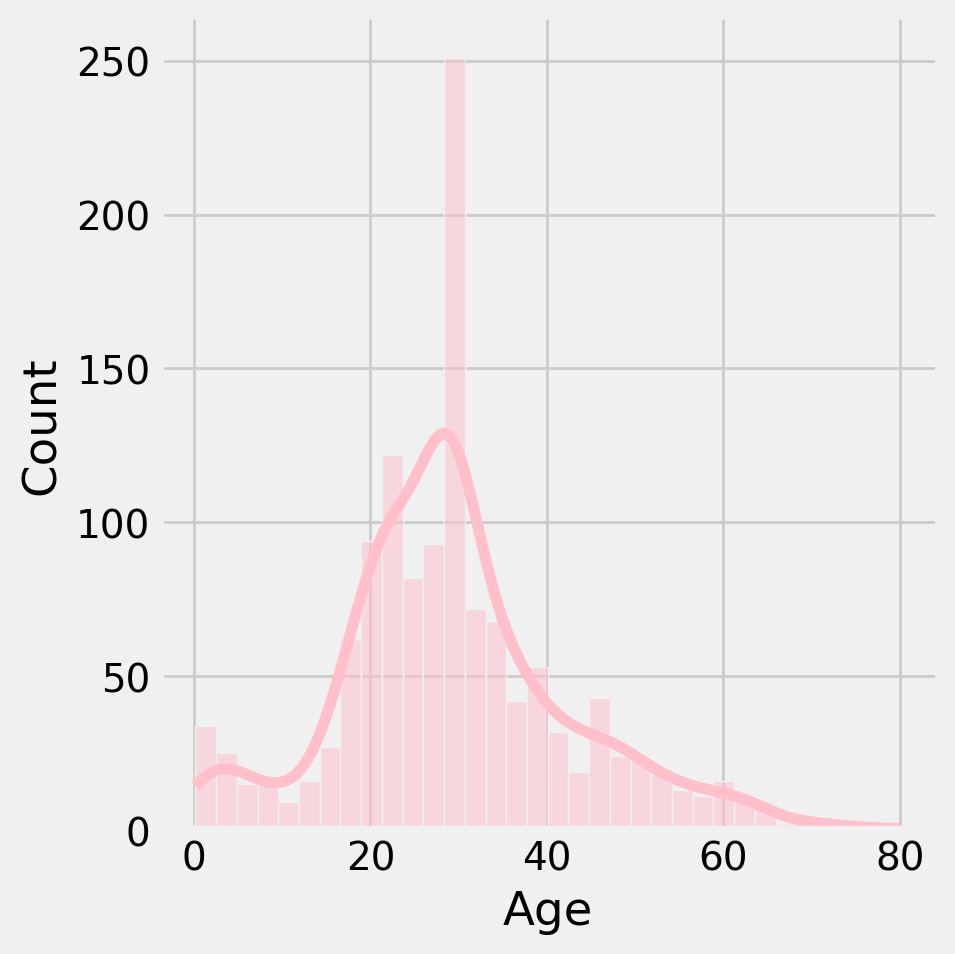

In [866]:
sns.displot(df['Age'], kde=True, color='pink')
plt.show()

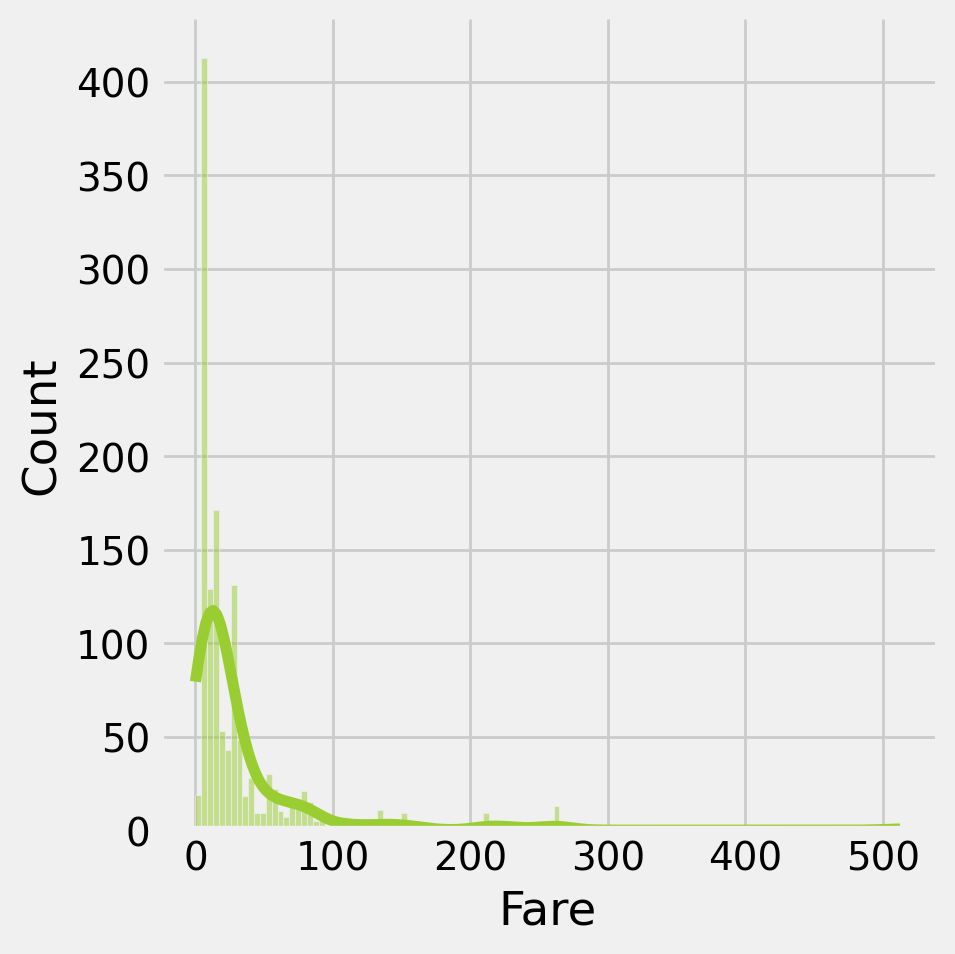

In [867]:
sns.displot(df['Fare'], kde=True, color='yellowgreen')
plt.show()

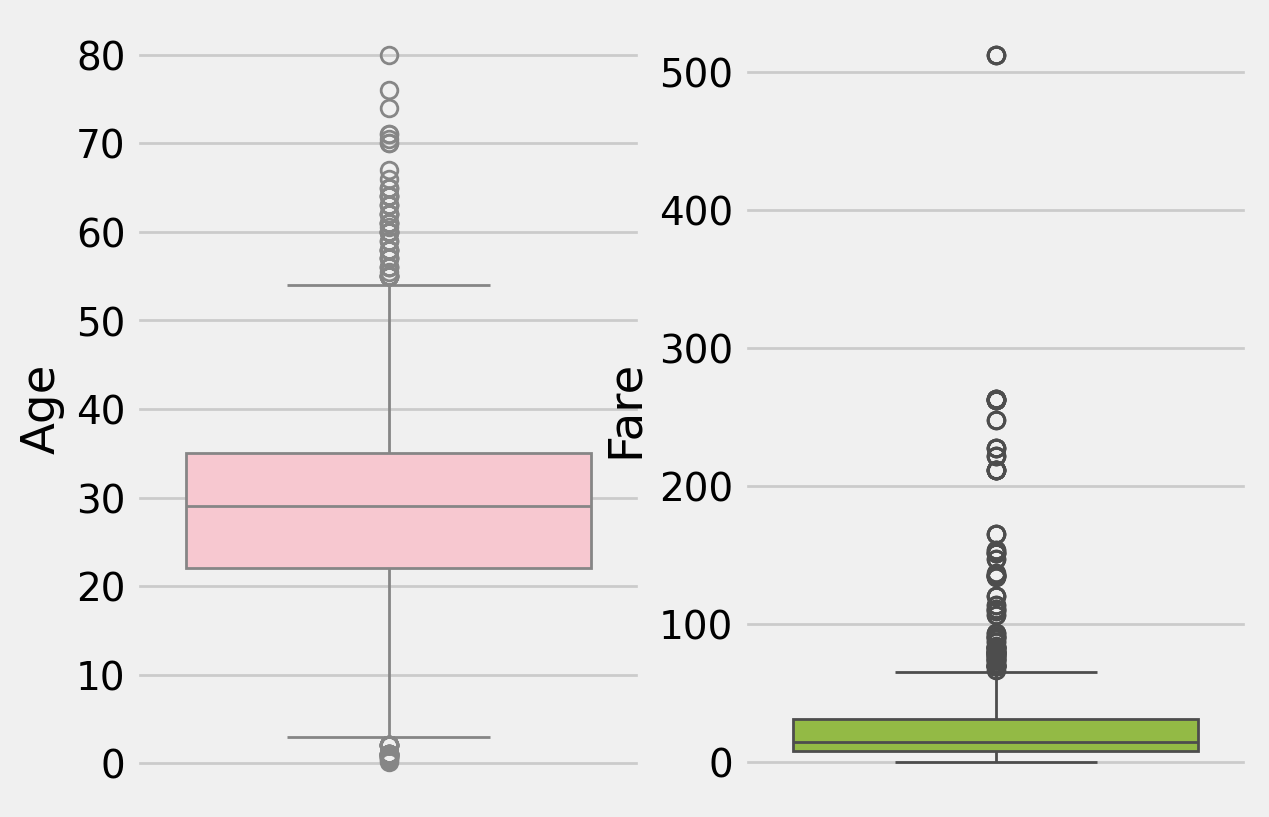

In [868]:
# 박스플롯으로 이상치 확인
fig, axes = plt.subplots(1, 2)
sns.boxplot(ax=axes[0], y=df['Age'], color='pink')
sns.boxplot(ax=axes[1], y=df['Fare'], color='yellowgreen')
plt.show()

Age 이상치 처리

In [869]:
from scipy import stats

z_scores = stats.zscore(df['Age'])
abs_z_scores = np.abs(z_scores)
age_threshold = 3
age_outliers = df[abs_z_scores > age_threshold]

print("Age 이상치 (Z-score 기준):")
print(age_outliers)

Age 이상치 (Z-score 기준):
     PassengerId  Survived  Pclass  \
96            97       0.0       1   
116          117       0.0       3   
493          494       0.0       1   
630          631       1.0       1   
672          673       0.0       2   
745          746       0.0       1   
851          852       0.0       3   
96           988       NaN       1   

                                                  Name     Sex   Age  SibSp  \
96                           Goldschmidt, Mr. George B    male  71.0      0   
116                               Connors, Mr. Patrick    male  70.5      0   
493                            Artagaveytia, Mr. Ramon    male  71.0      0   
630               Barkworth, Mr. Algernon Henry Wilson    male  80.0      0   
672                        Mitchell, Mr. Henry Michael    male  70.0      0   
745                       Crosby, Capt. Edward Gifford    male  70.0      1   
851                                Svensson, Mr. Johan    male  74.0      0   
96 

In [870]:
df = df[abs_z_scores <= age_threshold]

In [871]:
print(df.shape)

(1301, 13)


Fare 이상치 처리

In [872]:
# Fare: IQR을 사용한 이상치 탐지 및 처리
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
fare_lower_bound = Q1 - 1.5 * IQR
fare_upper_bound = Q3 + 1.5 * IQR

fare_outliers = df[(df['Fare'] < fare_lower_bound) | (df['Fare'] > fare_upper_bound)]

print("\nFare 이상치 (IQR 기준):")
print(fare_outliers)

# 이상치를 제거하거나 대체 (여기서는 제거)
df = df[(df['Fare'] >= fare_lower_bound) & (df['Fare'] <= fare_upper_bound)]


Fare 이상치 (IQR 기준):
     PassengerId  Survived  Pclass  \
1              2       1.0       1   
27            28       0.0       1   
31            32       1.0       1   
34            35       0.0       1   
52            53       1.0       1   
..           ...       ...     ...   
397         1289       NaN       1   
400         1292       NaN       1   
407         1299       NaN       1   
411         1303       NaN       1   
414         1306       NaN       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  35.0      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                               

In [873]:
print(df.shape)

(1132, 13)


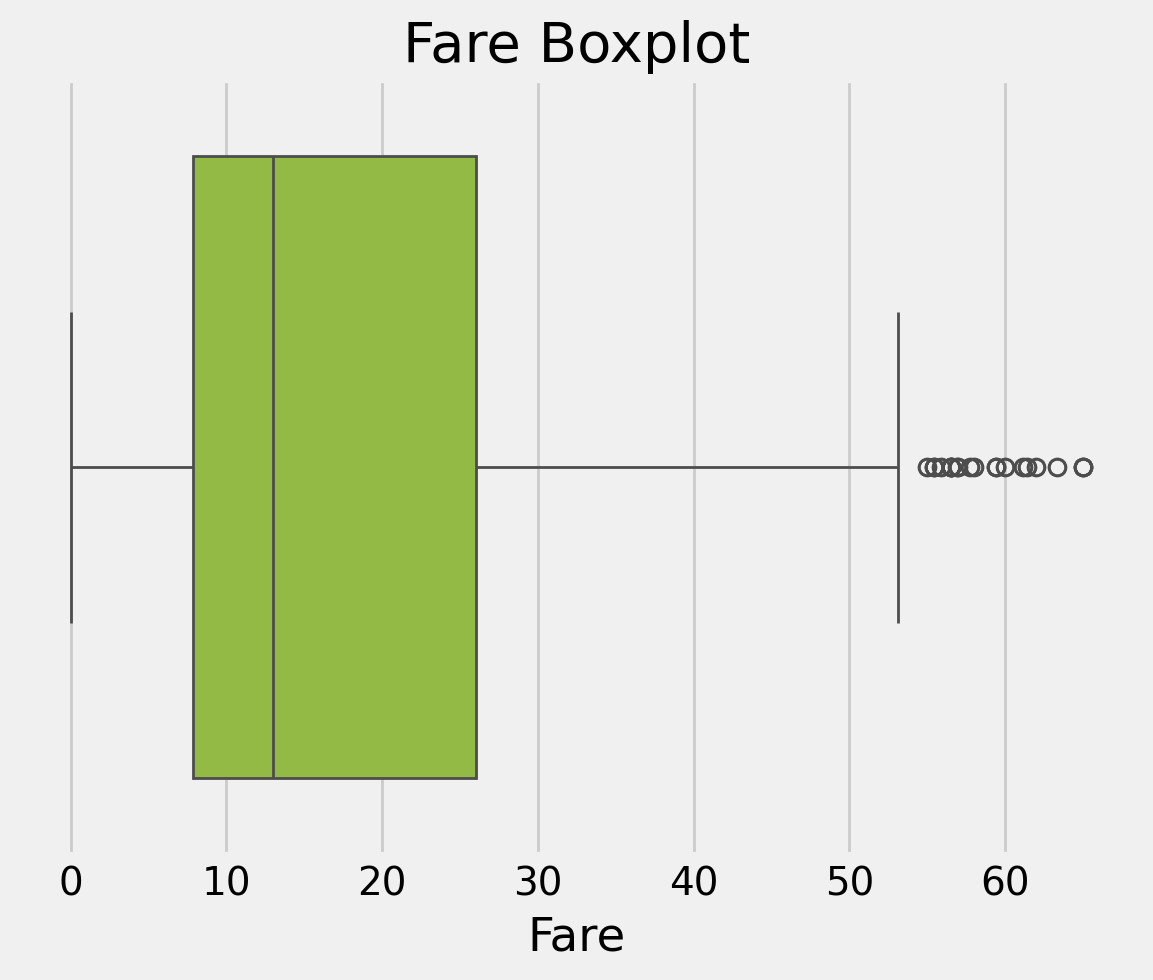

In [874]:
# IQR을 이용한 이상치 제거
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_fare = detect_outliers_iqr(df, 'Fare')

sns.boxplot(x=df['Fare'], color='yellowgreen')
plt.title('Fare Boxplot')

plt.show()

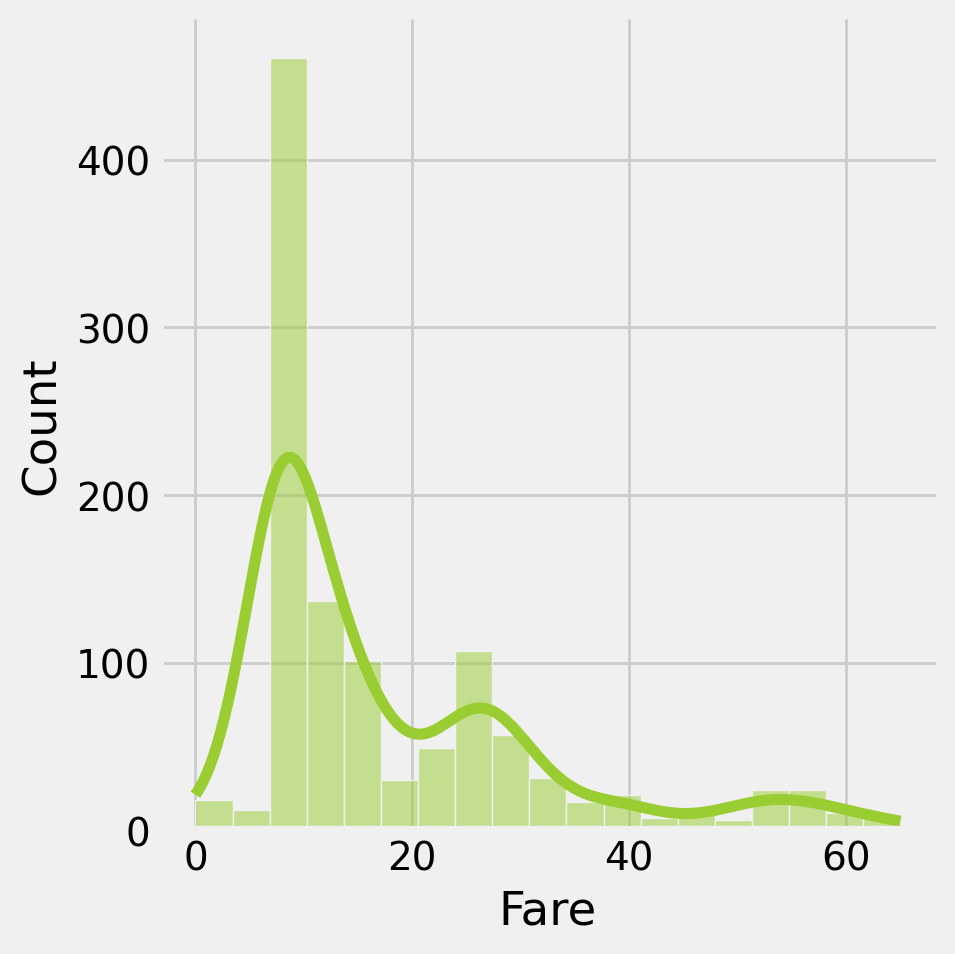

In [875]:
sns.displot(df['Fare'], kde=True, color='yellowgreen')
plt.show()

In [876]:
print(df.shape)

(1132, 13)


## 피처 선택: 피쳐 제거
의미없는 피처(PassengerId)와 결측치가 매우 많은 피처(Cabin)는 드랍함.


In [877]:
df = df.drop(['PassengerId', 'Cabin'], axis=1)

In [878]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
5,0.0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q,Mr
...,...,...,...,...,...,...,...,...,...,...,...
412,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S,Miss
413,NaN,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,S,Mr
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
416,NaN,3,"Ware, Mr. Frederick",male,29.0,0,0,359309,8.0500,S,Mr


In [879]:
print(df.shape)

(1132, 11)


## 왜도 처리
데이터의 분포가 치우쳐 있을 때 왜도 처리를 함.

1. 로그 변환: 큰 수를 작은 수로 변환함으로써 계산 용이,
왜도와 첨도를 줄임으로써 분석에서 더 정확한 값을 얻을 수 있음.
데이터 값 간 간격이 클 경우 좁혀줌.
2. 루트(제곱근) 변환: 치우친 분포 정규화.
변수간 비선형 상관성을 선형 상관성으로 변환,
선형 회귀에서 잔차의 이분산성 감소,
데이터의 특정 부분을 시각화하는 데 집중
3. Box-Cox 변환: 데이터가 양수일 때 사용되며, 데이터를 어떤 지수로 제곱하는 방법으로 변환. λ 값이 0일 경우 로그 변환, 1인 경우는 원래 데이터 이용과 같음.

### 로그 변환
데이터 중 0이 있다면 전체에 1을 더한 후 로그 변환을 사용해야 한다. (np.log1p)

In [880]:
df_log = df.copy()
df_log['Fare'] = np.log1p(df_log['Fare'])

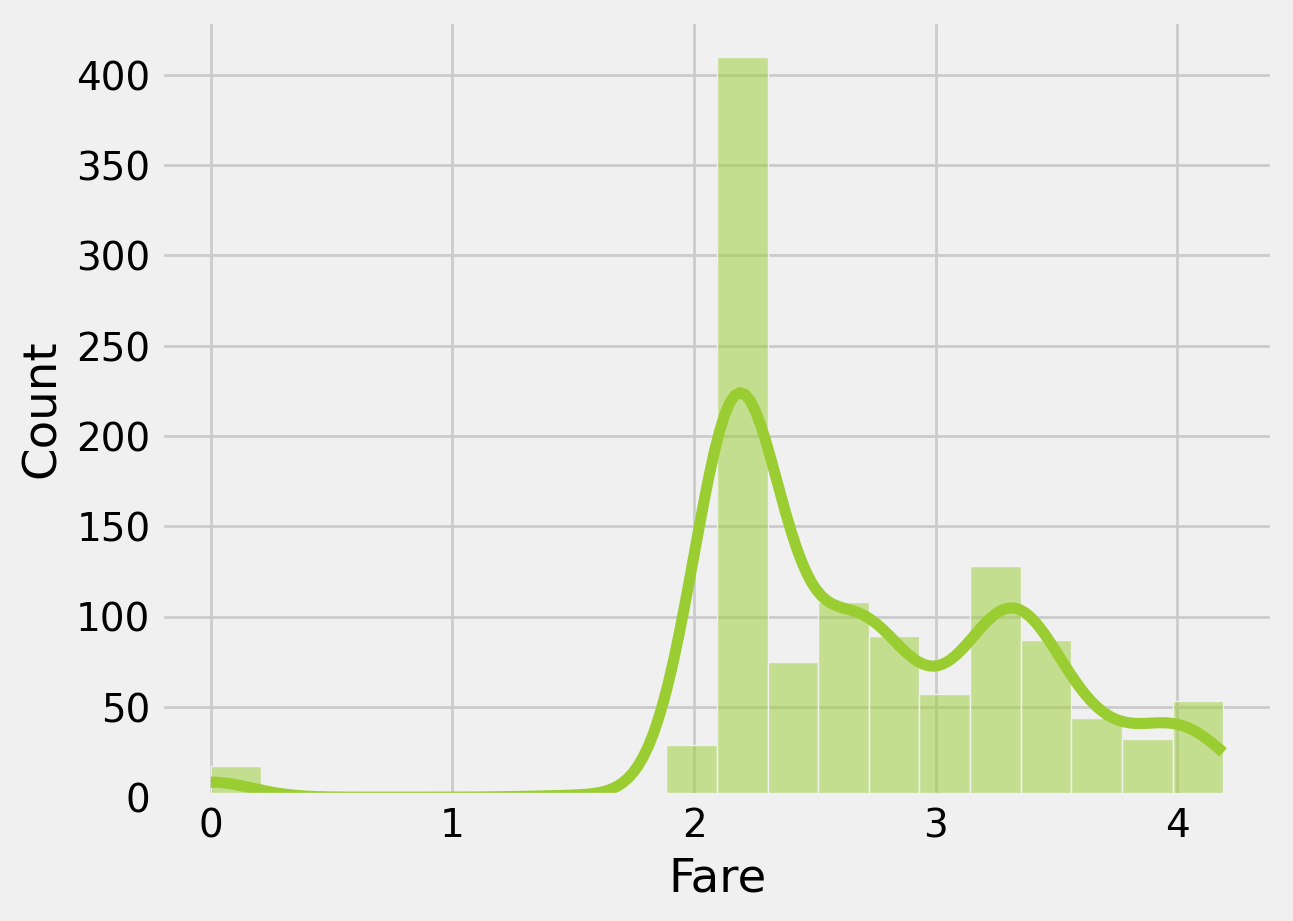

In [881]:
sns.histplot(df_log['Fare'], kde=True, color="yellowgreen")
plt.show()

### 제곱근 변환

In [882]:
df_sqrt = df.copy()
df_sqrt['Fare'] = np.sqrt(df_sqrt['Fare'])

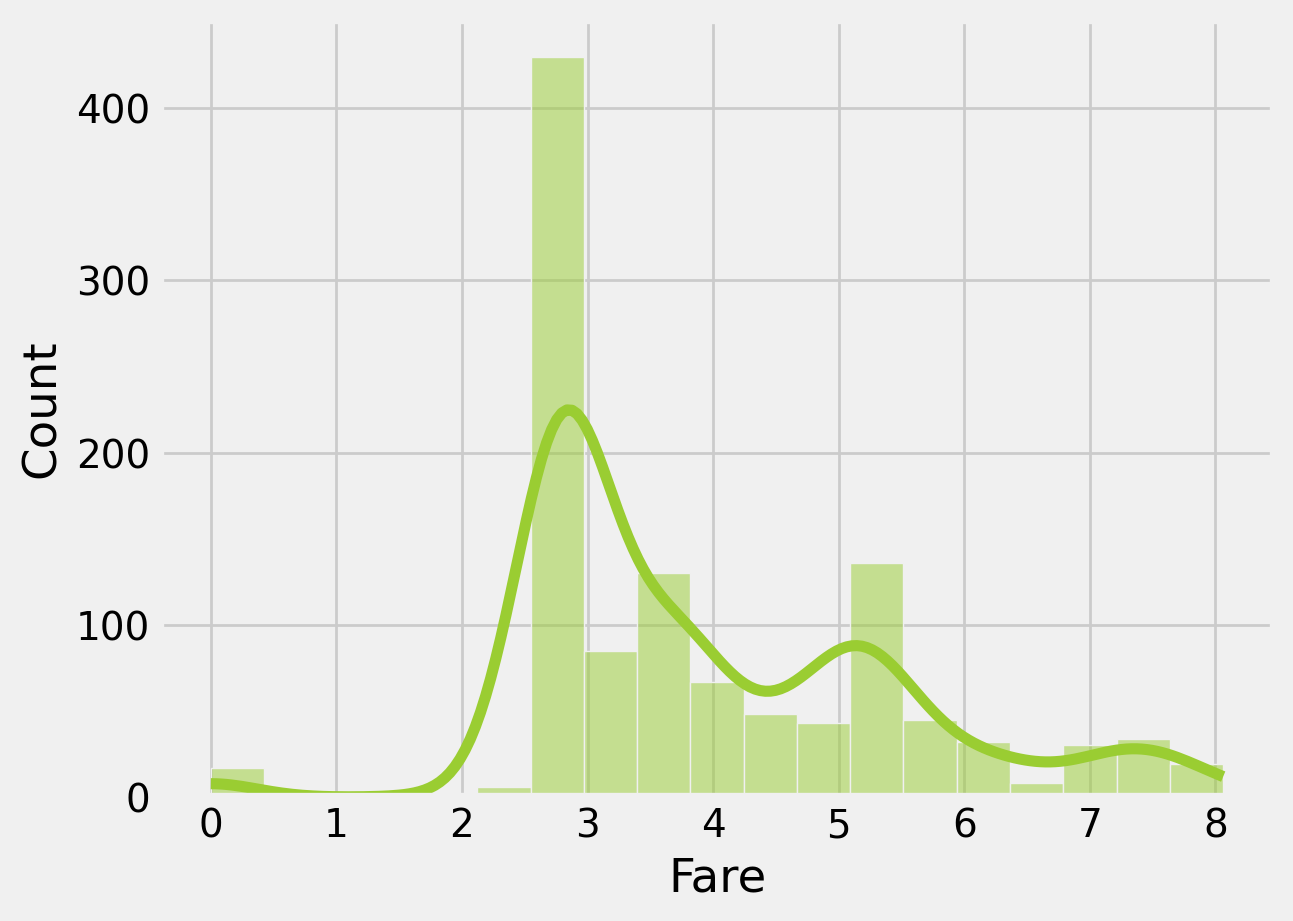

In [883]:
sns.histplot(df_sqrt['Fare'], kde=True, color="yellowgreen")
plt.show()

### Box-Cox 변환

In [884]:
from scipy import stats
df_boxcox = df.copy()
df_boxcox['Fare'], best_lambda = stats.boxcox(df_boxcox['Fare'] + 1)

print(df_boxcox['Fare'])
print(best_lambda)

0      2.344520
2      2.441626
3      4.884812
4      2.458877
5      2.513768
         ...   
412    2.420634
413    2.458877
415    2.344520
416    2.458877
417    3.692259
Name: Fare, Length: 1132, dtype: float64
0.0981009155754649


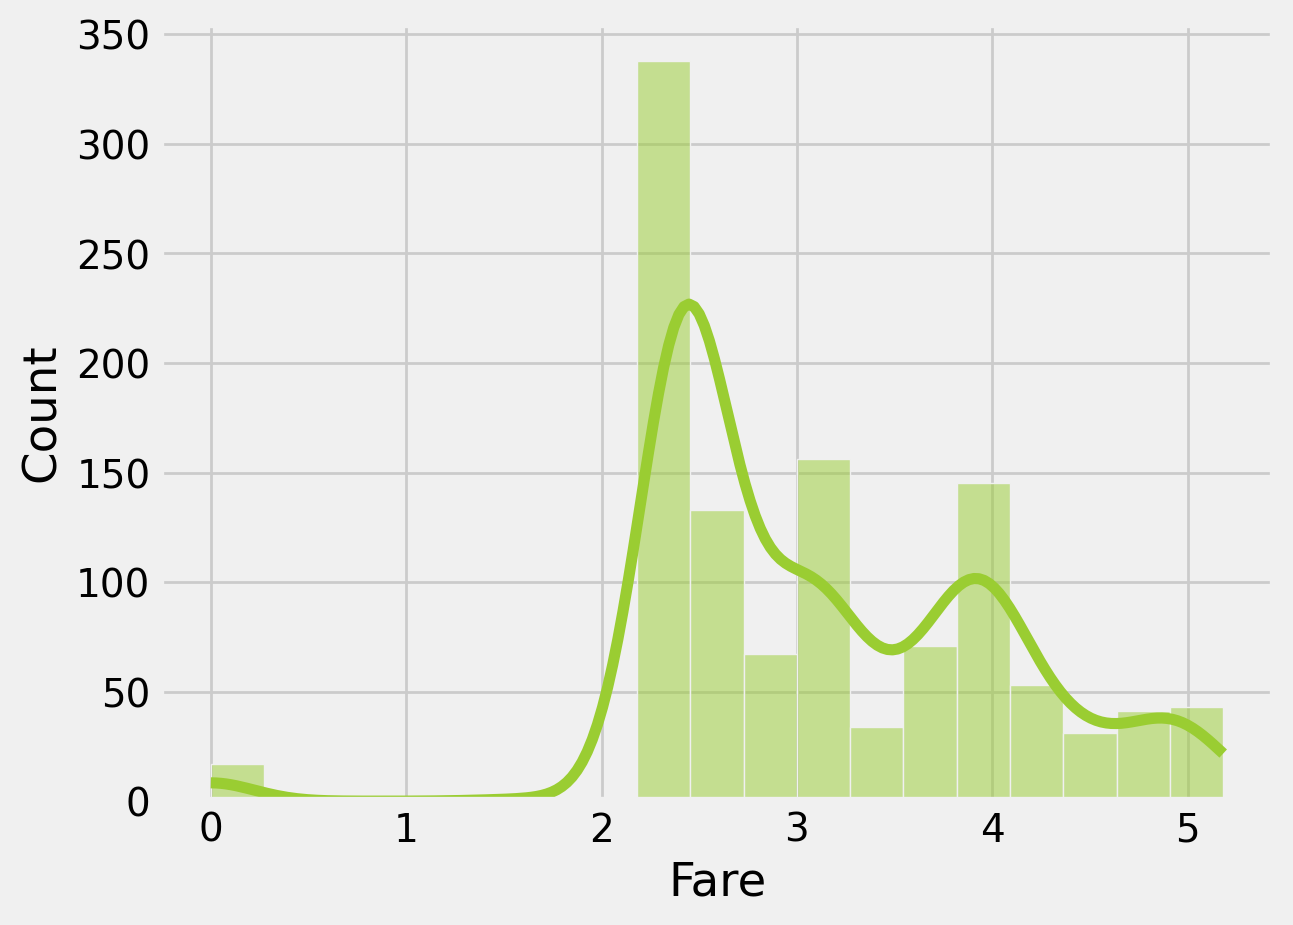

In [885]:
sns.histplot(df_boxcox['Fare'], kde=True, color="yellowgreen")
plt.show()

Box-Cox 변환이 정규분포에 그나마 제일 가까워보임, 사용.

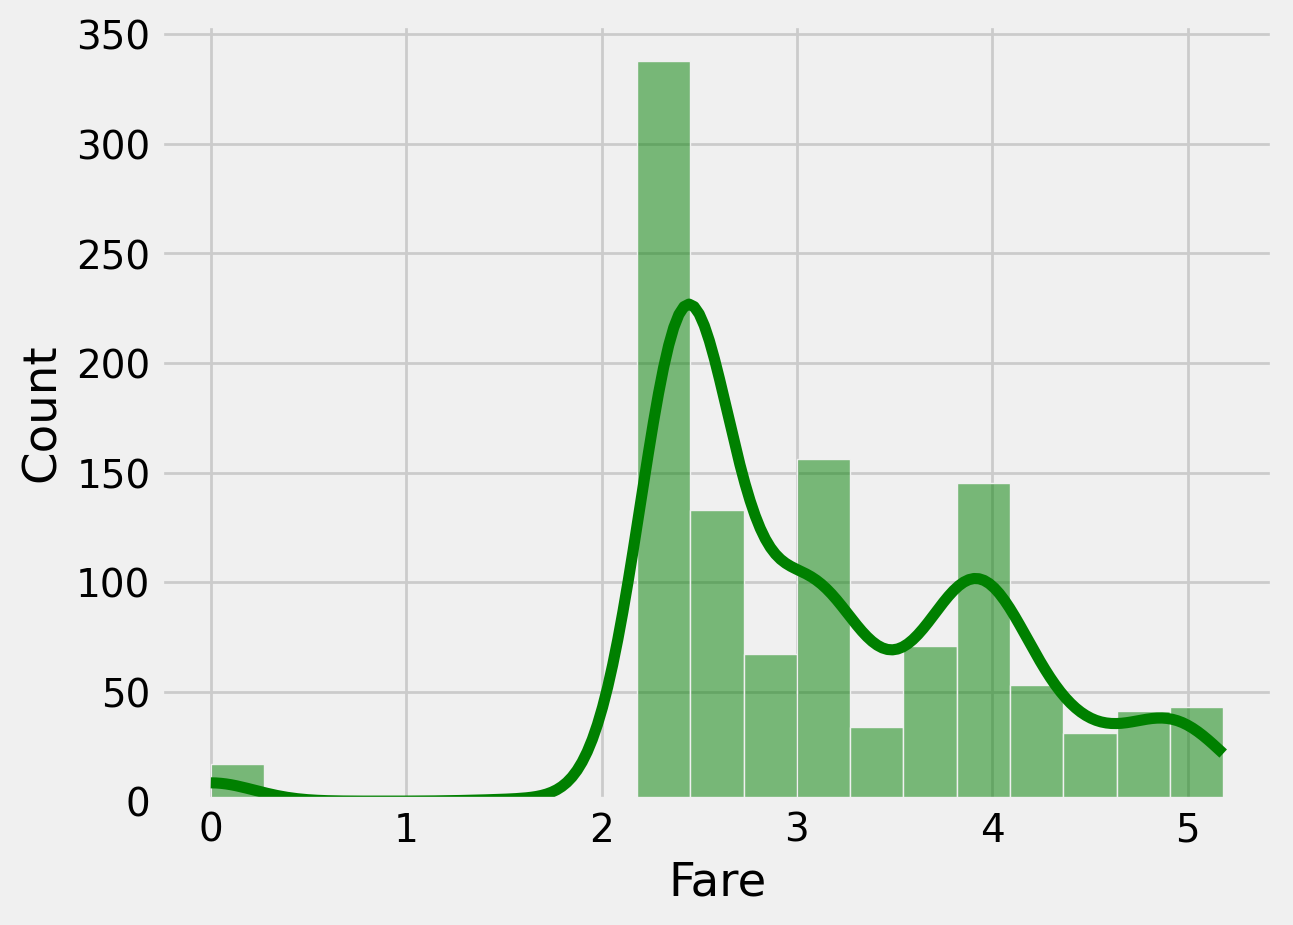

In [886]:
df['Fare'], best_lambda = stats.boxcox(df['Fare'] + 1)
sns.histplot(df['Fare'], kde=True, color="green")
plt.show()

## 범주형 변수 인코딩

모델링을 진행할 때 범주형 변수를 그대로 넣으면 모델이 인식하지 못하고 에러를 발생시킴->수치형 변수로 인코딩하는 과정 필요.
- Label Encoding  
한 컬럼(변수) 내에 존재할 수 있는 n개의 특성값을 각각 0 ~ n-1 의 연속적 수치 데이터로 변환시켜주는 방법.
- One-Hot Encoding  
한 컬럼(변수) 내에 존재할 수 있는 n개의 특성값들을 각각 n개의 비트 벡터로 표현하는 방식을 사용하여 범주형 변수 인코딩.

인코딩할 범주형 변수는 'Pclass', 'Embarked', 'Sex'이다.
- Pclass: 등급을 나타내는, 순서형 데이터이므로 Label Encoding을 하는 것이 적합해보인다.
- Embarked, Sex: 순서가 없는 명목형 데이터이므로 원핫인코딩을 사용하는 것이 적합해보인다.(여기서는 더미변수로 만들어주었다.)
    * 더미화: 첫 번째 범주를 제거하여 다중공선성 피하는 방식.

In [887]:
from sklearn.preprocessing import LabelEncoder
# Pclass 인코딩
le = LabelEncoder()
df['Pclass'] = le.fit_transform(df['Pclass'])

In [888]:
# Embarked, Sex 인코딩
df = pd.get_dummies(df, columns=['Embarked', 'Sex'], drop_first=True)
df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Title,Embarked_Q,Embarked_S,Sex_male
0,0.0,2,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.344520,Mr,False,True,True
2,1.0,2,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.441626,Miss,False,True,False
3,1.0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,4.884812,Mrs,False,True,False
4,0.0,2,"Allen, Mr. William Henry",35.0,0,0,373450,2.458877,Mr,False,True,True
5,0.0,2,"Moran, Mr. James",29.0,0,0,330877,2.513768,Mr,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
412,NaN,2,"Henriksson, Miss. Jenny Lovisa",28.0,0,0,347086,2.420634,Miss,False,True,False
413,NaN,2,"Spector, Mr. Woolf",29.0,0,0,A.5. 3236,2.458877,Mr,False,True,True
415,NaN,2,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,2.344520,Mr,False,True,True
416,NaN,2,"Ware, Mr. Frederick",29.0,0,0,359309,2.458877,Mr,False,True,True


In [889]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Title', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

## 피처 선택: 다중공선성 확인 및 새로운 피처 생성

### 다중공선성 확인(VIF)

VIF: Variance Inflation Factor.  
VIF 값이 높으면, 해당 변수와 다른 변수 간 강한 상관관계가 있음=다중공선성 문제가 있음.

In [890]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_vars = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
dummy_vars = ['Embarked_Q', 'Embarked_S', 'Sex_male']

In [891]:
X_numeric = df[numeric_vars]
X_categorical = df[dummy_vars]
X = pd.concat([X_numeric, X_categorical], axis=1)

X = sm.add_constant(X)

X = X.astype(float)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     Variable        VIF
0       const  70.441956
1      Pclass   2.059743
2         Age   1.280493
3       SibSp   1.517898
4       Parch   1.430419
5        Fare   2.347539
6  Embarked_Q   1.606347
7  Embarked_S   1.508273
8    Sex_male   1.126629


VIF>5일 때, 다중공선성이 있을 수 있다고 해석한다, 여기서는 모든 변수가 5 이하이므로 문제가 없다고 볼 수 있다.

### 새 피처 생성: 일행 수, 직함
- Family Size  
SibSp와 Parch를 독립적으로 사용하는 것보다, '가족 구성원 수'로 묶어서 생각했을 때, 생존 가능성과의 연관성을 더 잘 나타낼 수 있을 것이라고 판단. 대신 SibSp, Parch를 드랍하여 과적합 가능성을 조금 더 줄임(추후 성능 비교 필요)
- Group Size  
Family Size는 연인, 아이와 함께한 유모 등 가족관계가 아닌 일행은 반영하지 않는다. 일행의 수(또는 일행의 존재 여부)가 생존에 미친 영향을 알아보고 싶었기에, 티켓 번호가 같은 사람들을 하나의 일행으로 간주하고자 이 변수를 생성하였다. (다만 이는 일행끼리 티켓을 따로 끊었을 경우를 반영하지 못한다는 한계...)(둘 다 모델에 넣어보고 성능 비교해보기)

- Total Group Size  
Family Size와 Group Size 중 큰 것으로 적용

- Title  
'Name'에서, Mr., Mrs., Miss, Dr. 등을 추출할 수 있음. 이를 통해 승객의 지위, 나이, 성별 같은 정보를 얻을 수 있을 것 같음.

#### Group Size(SibSp+Parch / Ticket)

In [892]:
# 가족 구성원 수=형제/자매/배우자+부모/자녀+본인
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Family_Size'].value_counts()

,count
Family_Size,
1,732
2,180
3,125
4,35
6,19
5,17
7,16
8,8


In [893]:
# 티켓 번호 기반 일행 수 계산
df['Group_Size'] = df.groupby('Ticket')['Ticket'].transform('count') - 1

In [894]:
# 최대 일행 수
df['Total_Group_Size'] = df[['Group_Size', 'Family_Size']].max(axis=1)

In [895]:
#df = df.drop(['SibSp', 'Parch'], axis=1)
df.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Title', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'Family_Size',
       'Group_Size', 'Total_Group_Size'],
      dtype='object')

#### Title(<-Name)(위에서 실행함)

- Miss: 미혼 여성, 여자아이
- Mrs: 기혼 여성
- Mr: 성인 남성
- Master: 남자아이
---
- Lady: 영국 귀족 여성
- Sir: 영국 기사 작위 남성
- Don: 스페인어권 귀족 남성
- Jonkheer: 네덜란드 귀족 남성
- Col: 군사 계급. 대령.
- Major: 군사 계급. 중령.
- Rev: 성직자
- Dr: 의사, 박사

=> 수가 많지 않기 때문에 합치기:  
Lady(1명)->Miss  
Sir+Don+Jonkheer->Royalty_M   
Col+Major->Military  
Rev  
Dr

In [896]:
# df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# df['Title'].value_counts()

In [897]:
# # 같은 의미의 타이틀은 합침
# df['Title'] = df['Title'].replace({
#     'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Lady': 'Miss',
#     'Sir': 'Royalty_M', 'Don': 'Royalty_M', 'Jonkheer': 'Royalty_M',
#     'Col': 'Military', 'Major': 'Military'
#     })
pd.crosstab(df['Title'], df['Sex_male'])
# # False=Male, True=Female

Sex_male,False,True
Title,,
Dr,1,4
Master,0,54
Military,0,5
Miss,215,0
Mr,0,691
Mrs,151,0
Rev,0,8
Royalty_M,0,3


In [898]:
# df['Title'].count()

## 데이터 스케일링



스케일링이 필요한 경우: 변수가 각각 다른 단위 및 범위를 가질 때, 회귀 모형이나 머신러닝 기법 등에서 문제를 일으키는 것을 방지하기 위함. 왜도와 첨도를 줄여 정규성 높아짐.

<스케일링 종류>  
1)    StandardScaler: 평균을 제거하고 단위 분산으로 조정. 평균을 0, 분산을 1로 스케일링. 이상치가 큰 데이터에는 취약하기에 이상치 제거 후 스케일링해야 함.  
2)    MinMaxScaler: 각 특성이 0과 1 사이에 위치하도록 스케일링함. 극단적 이상치 값에 매우 취약하기에 이상치 제거 후 스케일링해야 함.  
3)    MaxAbsScaler: 절댓값이 0과 1 사이에 위치하도록 스케일링함. (-1~1) 모든 데이터가 양수인 경우 MinMax와 동일. 이상치에 민감.  
4)    Robust Scaler: 평균과 분산 대신 사분위수를 사용함. 중앙값과 IQR을 사용하므로 이상치 영향 최소화.  
5)    Normalizer: 컬럼이 아닌 열 기준으로 열마다 정규화를 진행. 한 행의 모든 변수 사이의 유클리드 거리가 1이 되도록. 학습 속도 빠르고 과적합 확률 적어짐.

<타이타닉 데이터셋에서 적합한 스케일링 방법은? (연속형 변수 Age. Fare)>
- Age: standard scaler가, 정규분포를 따르고 이상치에 영향을 비교적 덜 받기 때문에 적합하다고 판단함.
- Fare: 이상치가 많으므로, 이상치 처리를 하지 않는다면 Robust scaler 사용할 수 있을 것임. 여기서는 이미 이상치 처리를 했으며 Box-Cox변환으로 좁은 범위에 분포하도록 처리했므로 Age와 같이 standard scaler를 적용하는 게 나아보임.

(또는 둘 다 스케일러를 적용하지 않는 것도 방법. 이미 어느 정도는 정규분포에 가까워짐...)

In [899]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [900]:
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Fare'] = scaler.fit_transform(df[['Fare']])

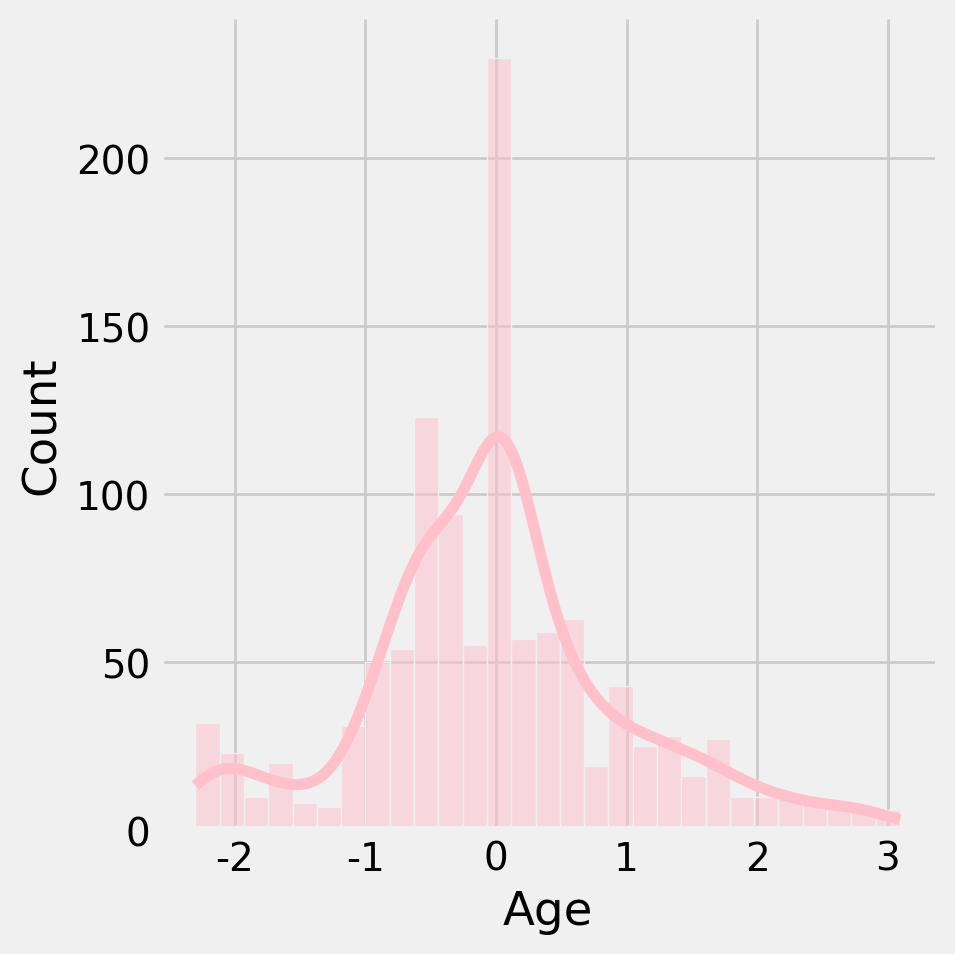

In [901]:
sns.displot(df['Age'], kde=True, color='pink')
plt.show()

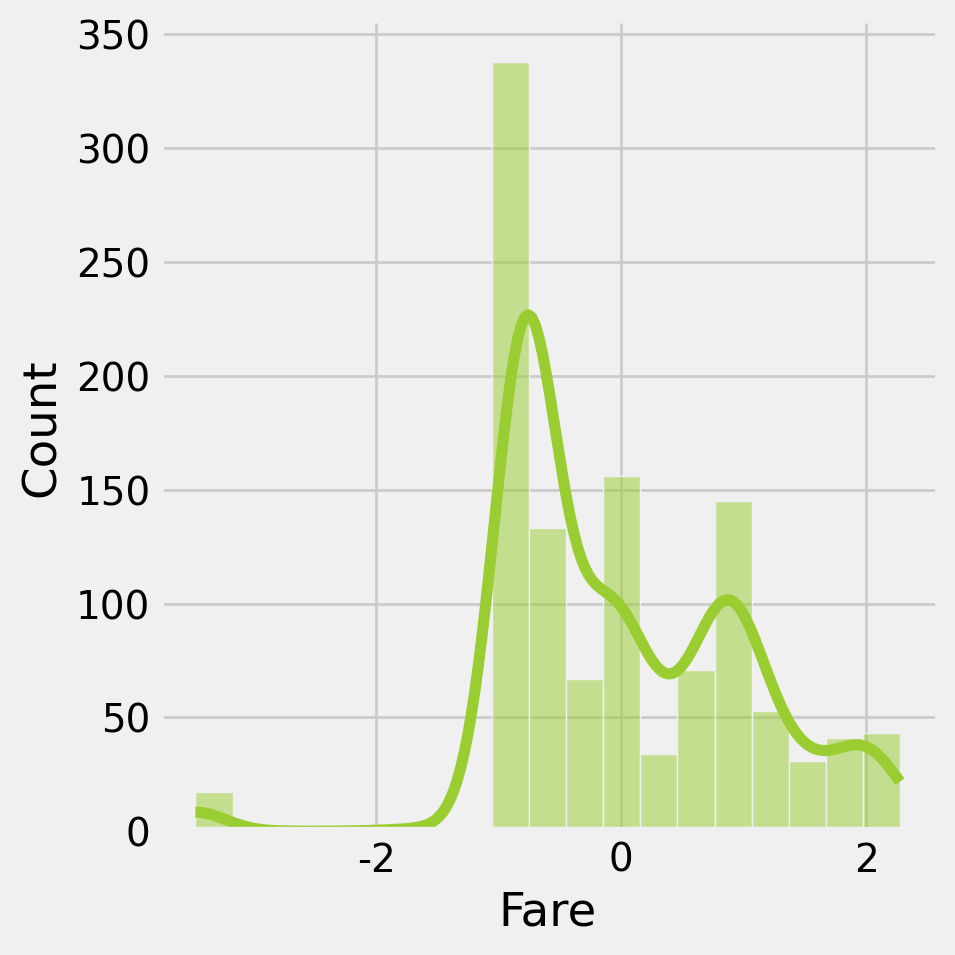

In [902]:
sns.displot(df['Fare'], kde=True, color='yellowgreen')
plt.show()

# 모델링

In [903]:
train = df[df['Survived'].notna()]
test = df[df['Survived'].isna()].drop('Survived', axis=1)

In [904]:
print(train.shape)
print(test.shape)

(769, 15)
(363, 14)


In [905]:
print(ori_train.shape)
print(ori_test.shape)

(891, 12)
(418, 12)


In [906]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Title', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'Family_Size',
       'Group_Size', 'Total_Group_Size'],
      dtype='object')

## 데이터 분할: 교차검증

교차검증을 하는 이유: 과적합을 피하기 위함.
- 과대적합이란?: 학습 데이터에 과하게 적합한 상태여서 다른 데이터에서는 정확한 예측이 불가한 상태.
- 과소적합이란?: 데이터가 부족하거나 데이터의 특성 자체가 너무 단순해서 기계가 제대로 학습이 되지 않은 상태.
---
- K-Fold: 집합을 체계적으로 바꿔가면서 모든 데이터에 대한 모델의 성과를 검증하는 방식.
- Stratified K-Fold: 불균형한 데이터셋을 위한 K-Fold 방법.

타이타닉 데이터셋은 Survived=1과 0의 비율이 불균형하므로, Stratified K-Fold가 더 적합할 것이다.


In [907]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# 새로 만든 피처 포함 X
X = train.drop(['Survived', 'Ticket', 'Name', 'Family_Size', 'Title', 'Group_Size', 'Total_Group_Size'], axis=1)
y = train['Survived']

In [908]:
rf = RandomForestClassifier(random_state=42)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf, X, y, cv=skf, scoring='accuracy')

print("Stratified K-Fold 교차검증 점수: ", cv_scores)
print("Stratified K-Fold 평균 교차검증 점수: ", cv_scores.mean())

Stratified K-Fold 교차검증 점수:  [0.79220779 0.79220779 0.78571429 0.82467532 0.81699346]
Stratified K-Fold 평균 교차검증 점수:  0.8023597317714964


In [909]:
from sklearn.model_selection import KFold

# K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

print("K-Fold 교차검증 점수: ", cv_scores)
print("K-Fold 평균 교차검증 점수: ", cv_scores.mean())


K-Fold 교차검증 점수:  [0.80519481 0.84415584 0.82467532 0.75974026 0.76470588]
K-Fold 평균 교차검증 점수:  0.799694423223835


## 모델 선택

In [910]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [911]:
from sklearn.metrics import classification_report, accuracy_score

### 로지스틱회귀모델

In [912]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, lr.predict(X_valid)))
print("Logistic Regression")
print(classification_report(y_valid, y_pred_lr))

Accuracy: 0.7922077922077922
Logistic Regression
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       168
         1.0       0.64      0.56      0.59        63

    accuracy                           0.79       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.79      0.79      0.79       231



### 랜덤포레스트

In [913]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, rf.predict(X_valid)))
print("Random Forest")
print(classification_report(y_valid, y_pred_rf))

Accuracy: 0.8138528138528138
Random Forest
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       168
         1.0       0.67      0.63      0.65        63

    accuracy                           0.81       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.81      0.81      0.81       231



### GBM

In [914]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, gbm.predict(X_valid)))
print("Gradient Boosting")
print(classification_report(y_valid, y_pred_gbm))

Accuracy: 0.8614718614718615
Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91       168
         1.0       0.79      0.67      0.72        63

    accuracy                           0.86       231
   macro avg       0.84      0.80      0.82       231
weighted avg       0.86      0.86      0.86       231



### LGBM

In [915]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, lgbm.predict(X_valid)))
print("LightGBM")
print(classification_report(y_valid, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 199, number of negative: 339
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 538, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369888 -> initscore=-0.532695
[LightGBM] [Info] Start training from score -0.532695
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### XGBoost

In [916]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, xgb.predict(X_valid)))
print("XGBoost")
print(classification_report(y_valid, y_pred_xgb))

Accuracy: 0.8311688311688312
XGBoost
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       168
         1.0       0.67      0.75      0.71        63

    accuracy                           0.83       231
   macro avg       0.79      0.80      0.79       231
weighted avg       0.84      0.83      0.83       231



### CatBoost

In [917]:
#pip install CatBoost

In [918]:
from catboost import CatBoostClassifier
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train)
y_pred_cat = catboost.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, y_pred_cat))
print("CatBoost")
print(classification_report(y_valid, y_pred_cat))

Learning rate set to 0.007906
0:	learn: 0.6890128	total: 1.09ms	remaining: 1.09s
1:	learn: 0.6846686	total: 2.34ms	remaining: 1.17s
2:	learn: 0.6802798	total: 3.57ms	remaining: 1.19s
3:	learn: 0.6776483	total: 4.31ms	remaining: 1.07s
4:	learn: 0.6748467	total: 5.03ms	remaining: 1s
5:	learn: 0.6702562	total: 6.07ms	remaining: 1.01s
6:	learn: 0.6678776	total: 6.76ms	remaining: 959ms
7:	learn: 0.6638395	total: 7.8ms	remaining: 968ms
8:	learn: 0.6605254	total: 8.79ms	remaining: 968ms
9:	learn: 0.6569840	total: 9.83ms	remaining: 974ms
10:	learn: 0.6533124	total: 10.9ms	remaining: 978ms
11:	learn: 0.6500561	total: 11.9ms	remaining: 981ms
12:	learn: 0.6463931	total: 12.9ms	remaining: 976ms
13:	learn: 0.6431791	total: 13.8ms	remaining: 973ms
14:	learn: 0.6392812	total: 14.8ms	remaining: 969ms
15:	learn: 0.6360627	total: 15.6ms	remaining: 957ms
16:	learn: 0.6338885	total: 16.3ms	remaining: 942ms
17:	learn: 0.6308236	total: 17.3ms	remaining: 945ms
18:	learn: 0.6279802	total: 18.4ms	remaining: 94

### SVM

In [919]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, svm.predict(X_valid)))
print("SVM")
print(classification_report(y_valid, y_pred_svm))

Accuracy: 0.8311688311688312
SVM
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       168
         1.0       0.71      0.63      0.67        63

    accuracy                           0.83       231
   macro avg       0.79      0.77      0.78       231
weighted avg       0.83      0.83      0.83       231



### KNN

In [920]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, knn.predict(X_valid)))
print("KNN")
print(classification_report(y_valid, y_pred_knn))

Accuracy: 0.7792207792207793
KNN
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       168
         1.0       0.60      0.57      0.59        63

    accuracy                           0.78       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.78      0.78      0.78       231



## 모델 평가 지표

모델 평가 지표 종류

<회귀모델 평가 지표>
- MAE (평균 절대 오차) : 정답값과 예측값의 차이를 절댓값으로 변환한 뒤 합산해 평균을 구함. 특이값이 많은 경우에 주로 사용됨. 값이 낮을수록 좋음.
- MSE (평균 제곱 오차) : 정답값과 예측값의 차이를 제곱한 뒤 평균을 구함. 가장 일반적/직관적. 값이 낮을수록 좋음.
- RMSE (평균 제곱근 오차) : MSE에 루트를 씌운 값. 값이 낮을수록 좋음.
- MAPE (평균 절대 비율 오차) : MAE를 비율, 퍼센트로 표현하여 스케일 의존적 문제를 개선.
- MPE (평균 백분율 오차) : MAPE에서 절댓값을 제외한 지표.

<분류모델 평가 지표>
- 정확도(Accuracy) : 전체 데이터 중에 정확하게 예측한 데이터의 수. 불균형한 데이터의 경우에는 적합하지 않음.
- 오차 행렬(Confusion Matrix) : 분류의 예측 범주와 실제 데이터의 분류 범주를 교차 표 형태로 정리한 행렬.
- 정밀도(Precision) : 분류 모델이 positive로 판정한 것 중, 실제로 positive인 샘플의 비율. positive로 검출된 결과가 얼마나 정확한지 나타냄.
- 재현율(Recall) : 실제 positive 샘플 중 분류 모델이 positive로 판정한 비율. 분류 모델이 실제 positive 클래스를 얼마나 빠지지 않고 잘 잡아내는지 측정함.
- F1-score : 분류 모델의 Precision과 Recall 성능을 동시에 고려해 종합적 평가를 하기 위해해 사용하는 지표로, Precision과 Recall의 조화평균.
- AUC - ROC : 실제 Negative label인 경우 중 모델이 positive로 예측한 비율.
- Precision-recall curve : x축을 recall, y축을 precision으로 하는 커브.


## 과적합 방지 모델
- 정규화(Regularization): L1, L2 정규화를 통해 모델의 복잡도를 조절하여 과적합을 방지
- 드롭아웃(Dropout): 신경망에서 드롭아웃을 사용하여 과적합을 방지. 딥러닝 모델에서 사용.
- 얼리 스탑핑(Early Stopping): 검증 데이터의 성능이 더 이상 개선되지 않으면 훈련을 조기에 중지

#### 정규화(Regulation)
- L1 정규화
- L2 정규화

In [921]:
from sklearn.linear_model import RidgeClassifier, Lasso

In [922]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, ridge.predict(X_valid)))
print("Ridge Logistic Regression")
print(classification_report(y_valid, y_pred_ridge))

Accuracy: 0.7878787878787878
Ridge Logistic Regression
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       168
         1.0       0.62      0.59      0.60        63

    accuracy                           0.79       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.78      0.79      0.79       231



In [923]:
lasso = LogisticRegression(penalty='l1', solver='liblinear')
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, lasso.predict(X_valid)))
print("Lasso Logistic Regression")
print(classification_report(y_valid, y_pred_lasso))

Accuracy: 0.7878787878787878
Lasso Logistic Regression
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       168
         1.0       0.62      0.56      0.59        63

    accuracy                           0.79       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.78      0.79      0.78       231



#### Early Stopping

# 모델 성능 개선

In [924]:
# 캐글 타이타닉 평가지표: Accuracy
print('모델별 Accuracy 비교')
print("lr:", accuracy_score(y_valid, lr.predict(X_valid)))
print("rf:", accuracy_score(y_valid, rf.predict(X_valid)))
print("gbm:", accuracy_score(y_valid, gbm.predict(X_valid)))
print("lgbm:", accuracy_score(y_valid, lgbm.predict(X_valid)))
print("xgb:", accuracy_score(y_valid, xgb.predict(X_valid)))
print("svm:", accuracy_score(y_valid, svm.predict(X_valid)))
print("knn:", accuracy_score(y_valid, knn.predict(X_valid)))
print("ridge:", accuracy_score(y_valid, ridge.predict(X_valid)))
print("lasso:", accuracy_score(y_valid, lasso.predict(X_valid)))
# GBM 성능이 가장 좋음.

모델별 Accuracy 비교
lr: 0.7922077922077922
rf: 0.8138528138528138
gbm: 0.8614718614718615
lgbm: 0.8398268398268398
xgb: 0.8311688311688312
svm: 0.8311688311688312
knn: 0.7792207792207793
ridge: 0.7878787878787878
lasso: 0.7878787878787878


### 파생변수 사용

In [925]:
# Family Size 사용+SibSp, Parch 드롭
X = train.drop(['Survived', 'Ticket', 'Name', 'Title', 'Group_Size', 'Total_Group_Size', 'SibSp', 'Parch'], axis=1)
y = train['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [926]:
gbm_1 = GradientBoostingClassifier()
gbm_1.fit(X_train, y_train)
y_pred_gbm_1 = gbm_1.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, gbm_1.predict(X_valid)))
print("Gradient Boosting")
print(classification_report(y_valid, y_pred_gbm_1))

Accuracy: 0.8528138528138528
Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       168
         1.0       0.76      0.67      0.71        63

    accuracy                           0.85       231
   macro avg       0.82      0.79      0.81       231
weighted avg       0.85      0.85      0.85       231



In [927]:
# Group_Size 사용+SibSp, Parch 드롭
X = train.drop(['Survived', 'Ticket', 'Name', 'Title', 'Family_Size', 'Total_Group_Size', 'SibSp', 'Parch'], axis=1)
y = train['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [928]:
gbm_1 = GradientBoostingClassifier()
gbm_1.fit(X_train, y_train)
y_pred_gbm_1 = gbm_1.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, gbm_1.predict(X_valid)))
print("Gradient Boosting")
print(classification_report(y_valid, y_pred_gbm_1))

Accuracy: 0.8441558441558441
Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       168
         1.0       0.75      0.65      0.69        63

    accuracy                           0.84       231
   macro avg       0.81      0.78      0.80       231
weighted avg       0.84      0.84      0.84       231



In [929]:
# Total_Group_Size 사용+SibSp, Parch 드롭
X = train.drop(['Survived', 'Ticket', 'Name', 'Title', 'Family_Size', 'Group_Size', 'SibSp', 'Parch'], axis=1)
y = train['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [930]:
gbm_1 = GradientBoostingClassifier()
gbm_1.fit(X_train, y_train)
y_pred_gbm_1 = gbm_1.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, gbm_1.predict(X_valid)))
print("Gradient Boosting")
print(classification_report(y_valid, y_pred_gbm_1))

Accuracy: 0.8571428571428571
Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       168
         1.0       0.79      0.65      0.71        63

    accuracy                           0.86       231
   macro avg       0.83      0.79      0.81       231
weighted avg       0.85      0.86      0.85       231



파생변수-Title

In [931]:
title_dummies = pd.get_dummies(train, columns=['Title'], drop_first=True)
title_dummies

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,...,Family_Size,Group_Size,Total_Group_Size,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Royalty_M
0,0.0,2,"Braund, Mr. Owen Harris",-0.512523,1,0,A/5 21171,-0.873435,False,True,...,2,0,2,False,False,False,True,False,False,False
2,1.0,2,"Heikkinen, Miss. Laina",-0.184659,0,0,STON/O2. 3101282,-0.765731,False,True,...,1,0,1,False,False,True,False,False,False,False
3,1.0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.553036,1,0,113803,1.944114,False,True,...,2,1,2,False,False,False,False,True,False,False
4,0.0,2,"Allen, Mr. William Henry",0.553036,0,0,373450,-0.746597,False,True,...,1,0,1,False,False,False,True,False,False,False
5,0.0,2,"Moran, Mr. James",0.061239,0,0,330877,-0.685715,True,False,...,1,0,1,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1,"Montvila, Rev. Juozas",-0.102693,0,0,211536,-0.132918,False,True,...,1,0,1,False,False,False,False,False,True,False
887,1.0,0,"Graham, Miss. Margaret Edith",-0.758422,0,0,112053,1.055028,False,True,...,1,0,1,False,False,True,False,False,False,False
888,0.0,2,"Johnston, Miss. Catherine Helen ""Carrie""",-0.512523,1,2,W./C. 6607,0.690570,False,True,...,4,3,4,False,False,True,False,False,False,False
889,1.0,0,"Behr, Mr. Karl Howell",-0.184659,0,0,111369,1.055028,False,False,...,1,0,1,False,False,False,True,False,False,False


In [932]:
X = title_dummies.drop(['Survived', 'Ticket', 'Name', 'Family_Size', 'Group_Size', 'Total_Group_Size'], axis=1)
y = train['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [933]:
gbm_1 = GradientBoostingClassifier()
gbm_1.fit(X_train, y_train)
y_pred_gbm_1 = gbm_1.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, gbm_1.predict(X_valid)))
print("Gradient Boosting")
print(classification_report(y_valid, y_pred_gbm_1))

Accuracy: 0.8484848484848485
Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90       168
         1.0       0.74      0.68      0.71        63

    accuracy                           0.85       231
   macro avg       0.81      0.80      0.80       231
weighted avg       0.85      0.85      0.85       231



### 분할 비율 조정

In [934]:
X = train.drop(['Survived', 'Ticket', 'Name', 'Family_Size', 'Title', 'Group_Size', 'Total_Group_Size'], axis=1)
y = train['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [935]:
gbm_1 = GradientBoostingClassifier()
gbm_1.fit(X_train, y_train)
y_pred_gbm_1 = gbm_1.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, gbm_1.predict(X_valid)))
print("Gradient Boosting")
print(classification_report(y_valid, y_pred_gbm_1))

Accuracy: 0.8636363636363636
Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91       110
         1.0       0.78      0.73      0.75        44

    accuracy                           0.86       154
   macro avg       0.84      0.82      0.83       154
weighted avg       0.86      0.86      0.86       154



오르긴 했다...

### 하이퍼파라미터 튜닝(GBM)
성능 제일 좋았던 GBM으로 랜덤서치, 그리드서치 진행

In [936]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [937]:
X = train.drop(['Survived', 'Ticket', 'Name', 'Family_Size', 'Title', 'Group_Size', 'Total_Group_Size'], axis=1)
y = train['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [938]:
# 랜덤서치
gbm_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}
gbm = GradientBoostingClassifier()
gbm_random = RandomizedSearchCV(gbm, gbm_params, n_iter=10, random_state=42, cv=3)
gbm_random.fit(X_train, y_train)
print("GBM Random Search Best Params:", gbm_random.best_params_)

y_pred_gbm_random = gbm_random.predict(X_valid)

print("GBM Accuracy:", accuracy_score(y_valid, y_pred_gbm_random))
print("GBM Classification Report:")
print(classification_report(y_valid, y_pred_gbm_random))

GBM Random Search Best Params: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.05}
GBM Accuracy: 0.8701298701298701
GBM Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       110
         1.0       0.80      0.73      0.76        44

    accuracy                           0.87       154
   macro avg       0.85      0.83      0.84       154
weighted avg       0.87      0.87      0.87       154



In [942]:
# 그리드서치
gbm_params_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt']
}

gbm = GradientBoostingClassifier()
gbm_grid = GridSearchCV(gbm, gbm_params_grid, cv=3)
gbm_grid.fit(X_train, y_train)
print("GBM Grid Search Best Params:", gbm_grid.best_params_)

y_pred_gbm_grid = gbm_grid.predict(X_valid)

print("GBM Accuracy:", accuracy_score(y_valid, y_pred_gbm_grid))
print("GBM Classification Report:")
print(classification_report(y_valid, y_pred_gbm_grid))

GBM Grid Search Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 1.0}
GBM Accuracy: 0.8506493506493507
GBM Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90       110
         1.0       0.74      0.73      0.74        44

    accuracy                           0.85       154
   macro avg       0.82      0.81      0.82       154
weighted avg       0.85      0.85      0.85       154

